# Planets and their satellites
## A comparitive analysis of Earth and the Moon in terms of density

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img = Image.open('solar.jpg')

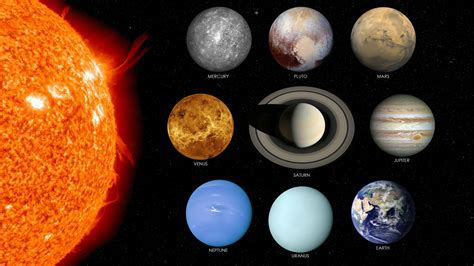

In [3]:
display(img)

## Importing datasets/csv files

In [4]:
planets = pd.read_csv("planets.csv")
planets1 = pd.read_csv("planets1.csv")

In [5]:
# Display the planet dataset
planets

,planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,...,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
5,Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,10747.0,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes
6,Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,30589.0,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,...,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [6]:
# Display the satellites dataset
planets1

,Name,Diameter,Mass,Inclination,Eccentricity,Semi_majorAxis,SurfaceGravity,OrbitalPeriod,SiderealRotation,Satellites
0,Mercury,4879.4,3.302×10^23,7.004000,0.205636,0.387099,3.70,0.241000,58.650000,0
1,Venus,12103.6,4.869×10^24,3.394710,0.006777,0.723336,8.87,0.615000,243.018700,0
2,Earth,12756.3,5.974×10^24,0.000050,0.016711,1.000003,9.78,1.000000,0.997271,1
3,Mars,6794.4,6.419×10^23,1.850610,0.093394,1.523710,3.71,1.881000,1.025950,2
4,Jupiter,142984.0,1.899×10^27,1.305300,0.048386,5.202887,24.79,11.860000,0.413500,63
5,Saturn,120536.0,5.688×10^26,2.484460,0.053862,9.536676,8.96,29.460000,0.426400,64
6,Uranus,51118.0,8.683×10^25,0.774000,0.047257,19.189165,7.77,84.010000,0.718100,27
7,Neptune,49572.0,1.024×10^26,1.769170,0.008590,30.069923,11.00,164.790000,0.671200,14
8,Pluto,2370.0,1.3×10^22,17.089001,0.250249,39.445070,0.62,247.740662,6.387230,5


In [7]:
# Rename column for easier merging
planets1 = planets.rename(columns={'Diameter':'diameter', 'Name':'planet'})
planets1

,planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,...,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
5,Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,10747.0,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes
6,Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,30589.0,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,...,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [8]:
# Merging the datasets
planet_size = planets.merge(planets1, on='diameter')
planet_size

,planet_x,mass_x,diameter,density_x,gravity_x,escape_velocity_x,rotation_period_x,length_of_day_x,distance_from_sun_x,perihelion_x,...,orbital_period_y,orbital_velocity_y,orbital_inclination_y,orbital_eccentricity_y,obliquity_to_orbit_y,mean_temperature_y,surface_pressure_y,number_of_moons_y,has_ring_system_y,has_global_magnetic_field_y
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
5,Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,10747.0,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes
6,Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,30589.0,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,...,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [9]:
# Merged dataset
planet_size

,planet_x,mass_x,diameter,density_x,gravity_x,escape_velocity_x,rotation_period_x,length_of_day_x,distance_from_sun_x,perihelion_x,...,orbital_period_y,orbital_velocity_y,orbital_inclination_y,orbital_eccentricity_y,obliquity_to_orbit_y,mean_temperature_y,surface_pressure_y,number_of_moons_y,has_ring_system_y,has_global_magnetic_field_y
0,Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
5,Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,10747.0,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes
6,Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,30589.0,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes
7,Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,...,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
8,Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [10]:
planet_size.set_index('planet_x')

,mass_x,diameter,density_x,gravity_x,escape_velocity_x,rotation_period_x,length_of_day_x,distance_from_sun_x,perihelion_x,aphelion_x,...,orbital_period_y,orbital_velocity_y,orbital_inclination_y,orbital_eccentricity_y,obliquity_to_orbit_y,mean_temperature_y,surface_pressure_y,number_of_moons_y,has_ring_system_y,has_global_magnetic_field_y
planet_x,,,,,,,,,,,,,,,,,,,,,
Mercury,0.3300,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,69.8,...,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
Venus,4.8700,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,108.9,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
Earth,5.9700,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,152.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
Mars,0.6420,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,249.2,...,687.0,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
Jupiter,1898.0000,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,816.6,...,4331.0,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
Saturn,568.0000,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,...,10747.0,9.7,2.5,0.057,26.700,-140,Unknown*,62,Yes,Yes
Uranus,86.8000,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,3003.6,...,30589.0,6.8,0.8,0.046,97.800,-195,Unknown*,27,Yes,Yes
Neptune,102.0000,49528,1638,11.0,23.5,16.1,16.1,4495.1,4444.5,4545.7,...,59800.0,5.4,1.8,0.011,28.300,-200,Unknown*,14,Yes,Yes
Pluto,0.0146,2370,2095,0.7,1.3,-153.3,153.3,5906.4,4436.8,7375.9,...,90560.0,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


<function matplotlib.pyplot.show(close=None, block=None)>

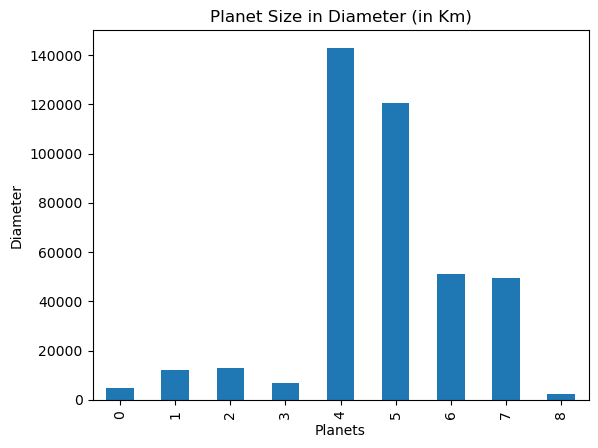

In [76]:
planet_size['diameter'].plot(kind = 'bar')
#plt.bar(planet_size['diameter'], planet_size['planet_x'])
plt.title('Planet Size in Diameter (in Km)')
plt.ylabel('Diameter')
plt.xlabel('Planets')
#plt.legend()
plt.show


Text(0, 0.5, 'Planets')

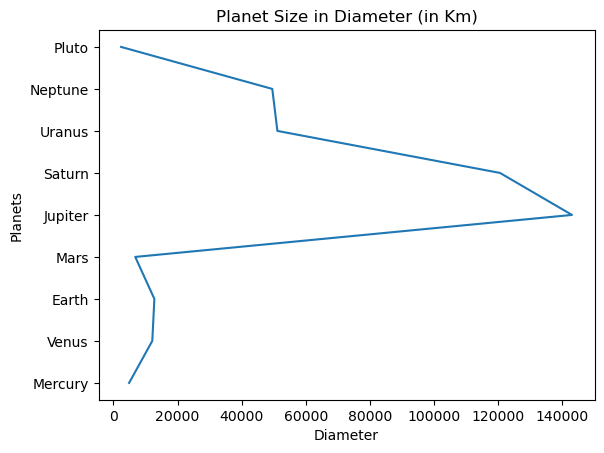

In [31]:
#plt.plot(planet_size['diameter'])
plt.plot(planet_size['diameter'], planet_size['planet_x'])
plt.title('Planet Size in Diameter (in Km)')
plt.xlabel('Diameter')
plt.ylabel('Planets')

<AxesSubplot:xlabel='diameter', ylabel='planet_x'>

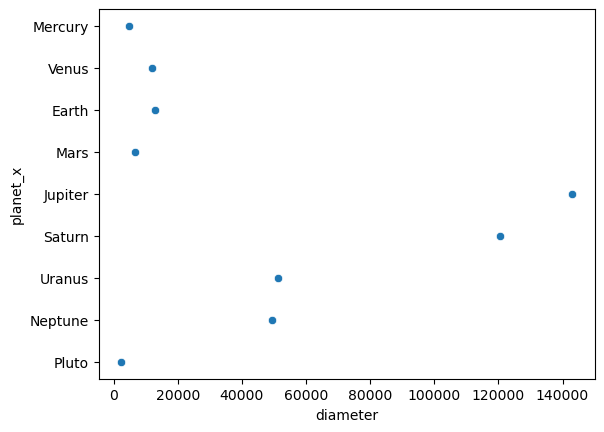

In [70]:
sns.scatterplot(x='diameter', y='planet_x', data=planet_size)